![title](image/ntu_logo.png)

# CZ1015 MiniProject: Introduction to Data Science and Artificial Intelligence

# Accidental Aviation Dataset Report
- A program coded in Python that analysis accidents characteristics using AccidentalAviation dataset. It is containing different accidents with respect to various different factors  

Made by: 

### Tran Anh Tai - U1820351C

### Sim Tian Quan - U1921887D

### Muhammad Nasran Hamza - U1921348G

### Kundu Kousani - U1922997B

### Group: FS406

# Problem Statement(s)

## 1. Investment of manufacture in terms of structure design (make, engine type, number of 

## engines, etc.)

## 2. Considering why famlilies choose to stay in places even with high accident frequencies.

## 3. Navigating clustering/ classification as  showing similar trends grouped together with 

## another problems. 

# Importing all important libraries required for data exploration

In [2]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Import the Accidental Aviation Dataset

Vital statistics of the dataset using type and shape attribute

In [3]:
# import data set to the colab notebook
data = pd.read_csv("AviationDataUP_edited.csv")
# data cleaning
data.columns = data.columns.str.upper() # 
data.columns = data.columns.str.replace(".", "_")
# print basic information for the data frame
print("Data type : ", type(data))
print("Data dims : ", data.shape)
# first 5 records in the data frame
data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (79141, 22)


EVENT_DATE             LOCATION        COUNTRY   LATITUDE  LONGITUDE  \
0  14/11/2016  Winton, New Zealand    New Zealand        NaN        NaN   
1  14/11/2016      Albrook, Panama         Panama        NaN        NaN   
2  13/11/2016       Port Allen, LA  United States  30.532500   -91.3150   
3  12/11/2016           Taylor, AZ  United States  34.454722  -110.0575   
4  12/11/2016       Pleasanton, TX  United States        NaN        NaN   

  AIRPORT_CODE              AIRPORT_NAME INJURY_SEVERITY AIRCRAFT_DAMAGE  \
0          NaN                       NaN       Non-Fatal     Substantial   
1         MPMG  Marcos A. Gelabert Intl.       Non-Fatal     Substantial   
2         LA46                      OMNI       Non-Fatal     Substantial   
3          NaN                       NaN       Non-Fatal     Substantial   
4          NaN                       NaN       Non-Fatal     Substantial   

  AIRCRAFT_CATEGORY  ... AMATEUR_BUILT NUMBER_OF_ENGINES    ENGINE_TYPE  \
0        Helicopter  ...            No               1.0    Turbo Shaft   
1          Airplane  ...            No               NaN            NaN   
2          Airplane  ...            No               1.0  Reciprocating   
3          Airplane  ...            No               1.0  Reciprocating   
4          Airplane  ...            No               1.0  Reciprocating   

   PURPOSE_OF_FLIGHT TOTAL_FATAL_INJURIES TOTAL_SERIOUS_INJURIES  \
0                NaN                  NaN                    NaN   
1                NaN                  NaN                    NaN   
2           Personal                  NaN                    NaN   
3      Instructional                  NaN                    NaN   
4           Personal                  NaN                    1.0   

   TOTAL_MINOR_INJURIES  TOTAL_UNINJURED  WEATHER_CONDITION  \
0                   NaN              1.0                NaN   
1                   NaN              2.0                VMC   
2                   NaN              1.0                VMC   
3                   NaN              2.0                VMC   
4                   NaN              1.0                VMC   

   BROAD_PHASE_OF_FLIGHT  
0            MANEUVERING  
1                LANDING  
2                TAKEOFF  
3            MANEUVERING  
4                    NaN  

[5 rows x 22 columns]

# Basic statistics

Get top 5 records in the dataset

Accidental DataFrame general information 

In [4]:
# data general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
Event.Id                  84262 non-null object
Investigation.Type        84257 non-null object
Accident.Number           84262 non-null object
Event.Date                84262 non-null object
Location                  84185 non-null object
Country                   83755 non-null object
Latitude                  30163 non-null float64
Longitude                 30154 non-null float64
Airport.Code              47723 non-null object
Airport.Name              50439 non-null object
Injury.Severity           84262 non-null object
Aircraft.Damage           81553 non-null object
Aircraft.Category         27508 non-null object
Registration.Number       80412 non-null object
Make                      84192 non-null object
Model                     84163 non-null object
Amateur.Built             83653 non-null object
Number.of.Engines         79228 non-null float64
Engine.Type             

Data basic statistics information 

In [5]:
# data statistics description
data.describe()

Latitude     Longitude  Number.of.Engines  Total.Fatal.Injuries  \
count  30163.000000  30154.000000       79228.000000          57059.000000   
mean      37.544907    -93.508337           1.146930              0.847614   
std       12.370282     39.454412           0.447004              6.292468   
min      -78.016945   -178.676111           0.000000              0.000000   
25%       33.307778   -114.861042           1.000000              0.000000   
50%       38.125278    -94.371667           1.000000              0.000000   
75%       42.524723    -81.650278           1.000000              1.000000   
max       89.218056    179.618611           8.000000            349.000000   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  
count            54384.000000          55592.000000     69673.000000  
mean                 0.331715              0.518708         5.901325  
std                  1.375602              2.771339        29.534302  
min                  0.000000              0.000000         0.000000  
25%                  0.000000              0.000000         0.000000  
50%                  0.000000              0.000000         1.000000  
75%                  0.000000              1.000000         2.000000  
max                111.000000            380.000000       699.000000

# Exploratory Data Analysis / Visualization

## Importing and cleaning the dataset

In [ ]:
f, axes = plt.subplots(2, 3, figsize = (30, 10))
sb.violinplot(x = "AMATEUR_BUILT", y = "TOTAL_FATAL_INJURIES", data = data, ax = axes[0, 0])
sb.violinplot(x = "AMATEUR_BUILT", y = "TOTAL_SERIOUS_INJURIES", data = data, ax = axes[0, 1])
sb.violinplot(x = "AMATEUR_BUILT", y = "TOTAL_MINOR_INJURIES", data = data, ax = axes[0, 2])

Description of the Dataset

### finish up for me!!!

In [10]:
location_data = dict(type = 'choropleth', 
                     locations = clean_data['LOCATION'],
                     locationmode = 'country names',
                     colorscale = 'Reds'
                     )
layout = dict(title = 'Locations', geo = dict(showframe = False, projection = {'type' : 'mercator'}))
chronomap = go.Figure(data = [location_data], layout = layout)
iplot(chronomap)

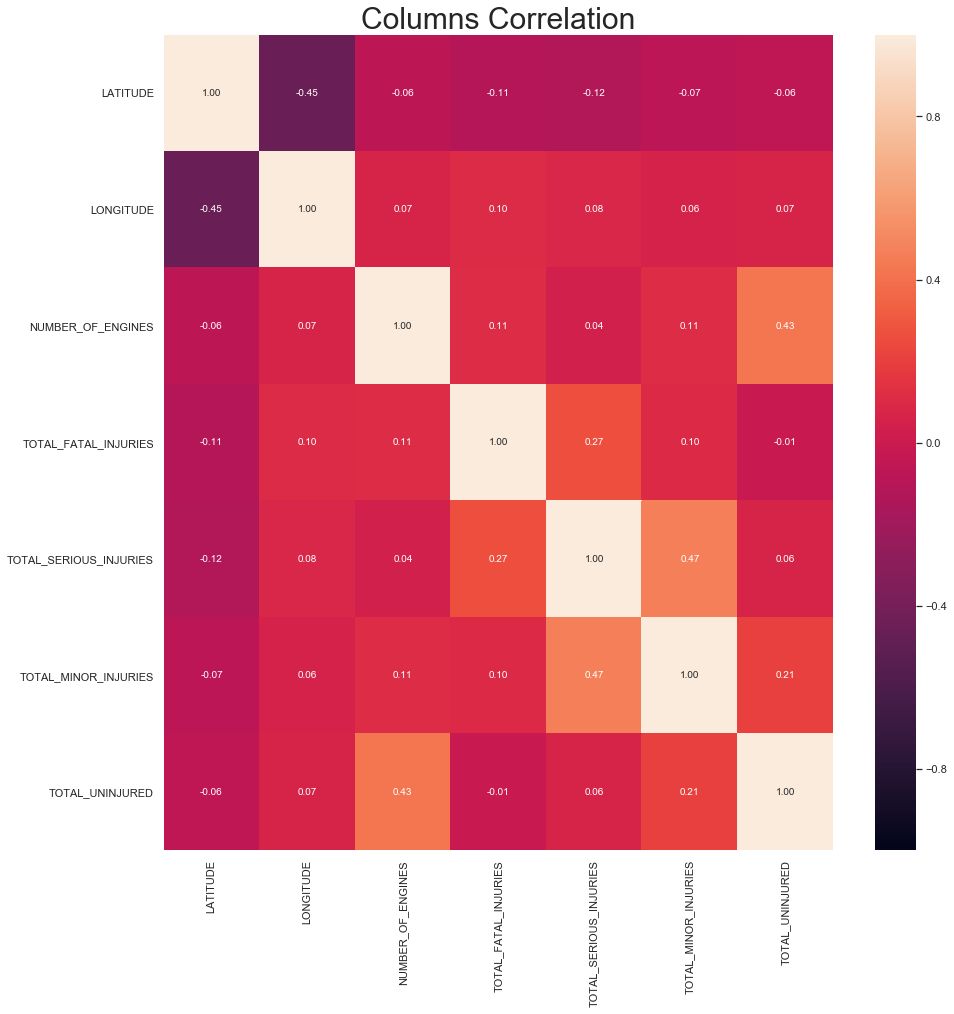

In [11]:
f, axes = plt.subplots(1, 1, figsize = (15, 15))
plt.title("Columns Correlation", fontsize = 30)
sb.heatmap(clean_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f')

In [5]:
# Extract the Features from the Data
X = pd.DataFrame(data[['LATITUDE','LONGITUDE','NUMBER_OF_ENGINES','TOTAL_FATAL_INJURIES','TOTAL_SERIOUS_INJURIES','TOTAL_MINOR_INJURIES','TOTAL_UNINJURED']])

# Check the Dataset
X.info()
# Fill missing values in data
X.fillna(value = "0", inplace = True)
# Replacing values that contain 'N/A' to a numeruc value of 0 to indicate as null instead.
X.replace('N/A', 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 7 columns):
LATITUDE                  25614 non-null float64
LONGITUDE                 25605 non-null float64
NUMBER_OF_ENGINES         75056 non-null float64
TOTAL_FATAL_INJURIES      55944 non-null float64
TOTAL_SERIOUS_INJURIES    53724 non-null float64
TOTAL_MINOR_INJURIES      54812 non-null float64
TOTAL_UNINJURED           66860 non-null float64
dtypes: float64(7)
memory usage: 4.2 MB


LATITUDE LONGITUDE NUMBER_OF_ENGINES TOTAL_FATAL_INJURIES  \
0            0         0                 1                    0   
1            0         0                 0                    0   
2      30.5325   -91.315                 1                    0   
3      34.4547  -110.058                 1                    0   
4            0         0                 1                    0   
5      40.9711  -74.9975                 1                    1   
6      29.4081  -81.5144                 1                    2   
7        34.16  -115.998                 0                    0   
8      44.3833   88.8525                 1                    0   
9        29.89  -97.8586                 1                    0   
10     43.5536  -109.709                 1                    1   
11     35.3508  -79.2958                 1                    0   
12     27.9433  -81.7833                 1                    0   
13     43.9919  -76.0206                 1                    0   
14           0         0                 0                    2   
15     38.3656  -85.7381                 2                    0   
16     35.0728  -77.0431                 1                    0   
17     32.6789  -96.8717                 0                    0   
18     61.4822  -148.772                 1                    1   
19     46.5883  -118.123                 0                    0   
20     36.6981  -107.992                 1                    0   
21     33.7194   -94.875                 1                    1   
22     61.0817  -153.518                 1                    1   
23       39.21  -93.9278                 1                    0   
24     34.7875  -102.388                 1                    0   
25           0         0                 2                    0   
26     29.5253  -95.2389                 0                    1   
27     37.9689  -121.889                 1                    2   
28     27.9131  -97.2114                 1                    0   
29     27.1956  -81.8403                 1                    0   
...        ...       ...               ...                  ...   
79111        0         0                 1                    0   
79112        0         0                 1                    0   
79113        0         0                 1                    2   
79114        0         0                 1                    0   
79115        0         0                 1                    0   
79116        0         0                 1                    0   
79117        0         0                 2                    8   
79118        0         0                 2                    1   
79119        0         0                 1                    0   
79120        0         0                 1                    0   
79121        0         0                 1                    0   
79122        0         0                 1                    1   
79123        0         0                 1                    1   
79124        0         0                 1                    2   
79125        0         0                 1                    0   
79126        0         0                 1                    0   
79127        0         0                 1                    0   
79128        0         0                 1                    0   
79129        0         0                 1                    3   
79130        0         0                 1                    0   
79131        0         0                 2                    0   
79132        0         0                 1                    0   
79133        0         0                 1                    0   
79134        0         0                 1                    0   
79135        0         0                 1                    4   
79136        0         0                 0                    1   
79137        0         0                 1                    2   
79138  36.9222  -81.8781                 1           

In [6]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Features 	LATITUDE 	LONGITUDE 	NUMBER_OF_ENGINES 	TOTAL_FATAL_INJURIES 	TOTAL_SERIOUS_INJURIES 	TOTAL_MINOR_INJURIES TOTAL_UNINJURED

Cluster 0:	38.51	-100.36	1.07	0.37	0.19	0.29	1.78	
Cluster 1:	0.46	0.93	1.08	0.68	0.22	0.33	1.92	
Cluster 2:	8.01	-19.69	2.02	0.13	0.52	2.41	189.05	

Within Cluster Sum of Squares : 41057830.85237415



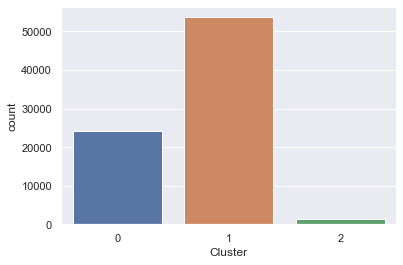

In [20]:
# Print the Cluster Centers
print("Features", "\tLATITUDE", "\tLONGITUDE", "\tNUMBER_OF_ENGINES", "\tTOTAL_FATAL_INJURIES", "\tTOTAL_SERIOUS_INJURIES", 
      "\tTOTAL_MINOR_INJURIES", "TOTAL_UNINJURED")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cfd0705898>)

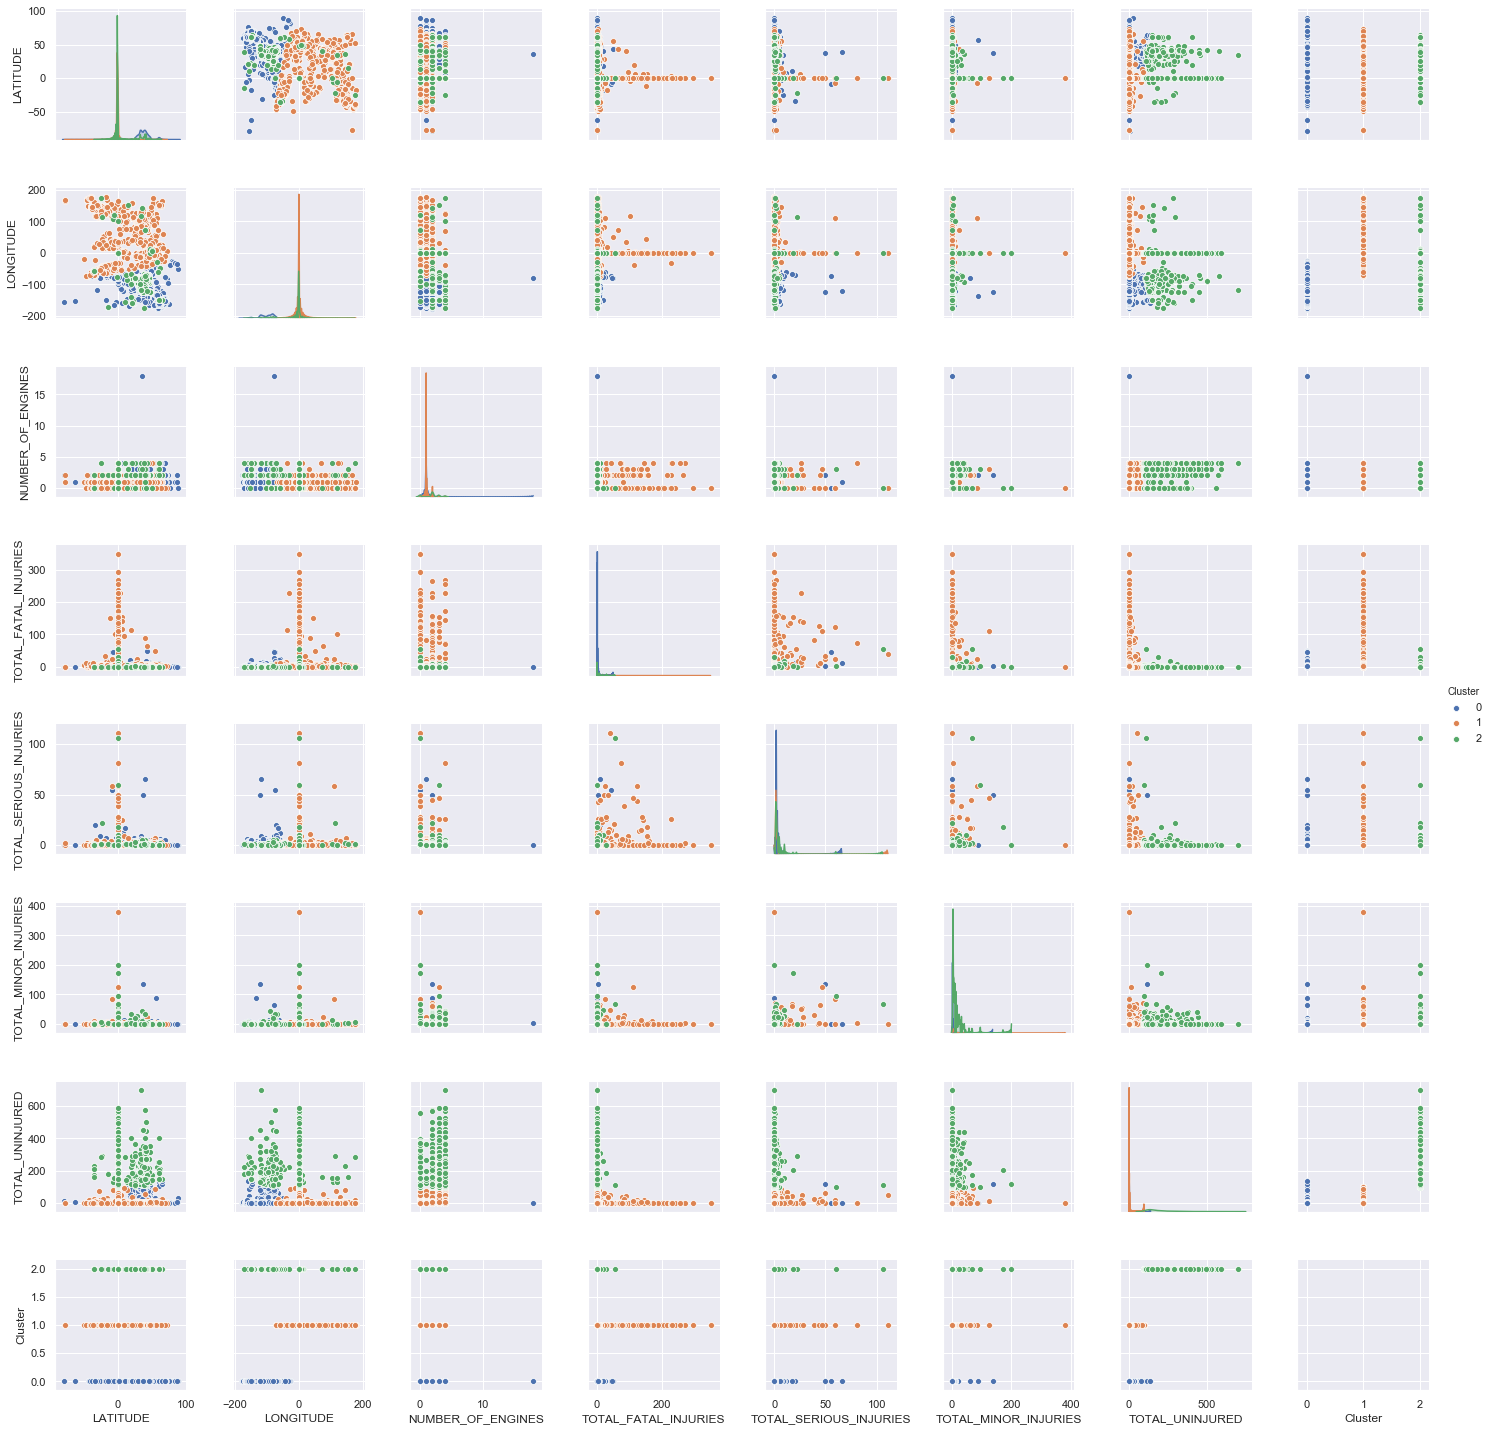

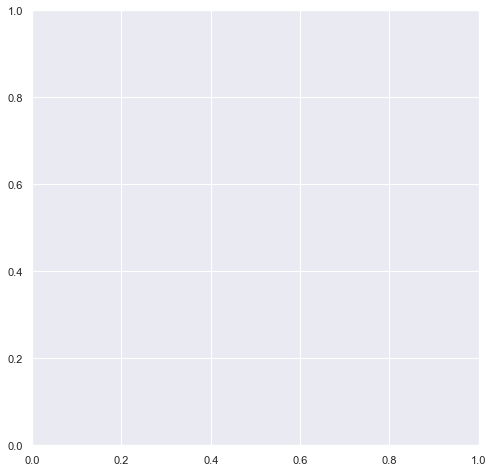

In [30]:
# Plot the Clusters on 2D grids 
#(This code has error generating, might crash)
T = X_labeled.copy()
T.loc[:, T.columns != "Cluster"] = T.loc[:, T.columns != "Cluster"].astype("float64")
sb.pairplot(T, vars = T.columns, hue = "Cluster")